# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 33.4 MB/s 
     |████████████████████████████████| 166 kB 63.9 MB/s 
     |████████████████████████████████| 182 kB 67.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 166 kB 66.9 MB/s 
     |████████████████████████████████| 162 kB 71.9 MB/s 
     |████████████████████████████████| 162 kB 65.3 MB/s 
     |████████████████████████████████| 158 kB 70.0 MB/s 
     |████████████████████████████████| 157 kB 47.9 MB/s 
     |████████████████████████████████| 157 kB 64.6 MB/s 
     |████████████████████████████████| 157 kB 70.5 MB/s 
     |████████████████████████████████| 157 kB 69.3 MB/s 
     |████████████████████████████████| 157 kB 72.9 MB/s 
     |████████████████████████████████| 157 kB 70.4 MB/s 
     |████████████████████████████████| 157 kB 66.7 MB/s 
     |███████████████████████████

In [2]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=c69c7712aabd5fb5d703e700bbafae92c6e22097a61017e8bea019fbf354eecc
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [3]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
import math
import os
import random
import sys

from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchmetrics
import torchvision.transforms as transforms
import PIL
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from efficientnet_pytorch import EfficientNet
# You may add any imports you need

In [5]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [6]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2022-11-08 18:36:10--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-08 18:36:11--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca89bed24cbc3c4363499c897f5.dl.dropboxusercontent.com/cd/0/get/BwZ7tgN8zbn33fZDyYSUErTTkq8yBRJDY0zZK8NKDiQreOxzBdJ6h66vPq6wBeYUUL7rGUbH5lWqr35Pc4aRtqLDDSuQNuMucVUVR7TRCGLcdaQlAiNBiknJ2XkOy1HPtpa1OLcsuPT1xpKl7zgVikTSKZn735OzZcw6Ue7hgAGoSQ/file?dl=1# [following]
--2022-11-08 18:36:11--  https://uca89bed24cbc3c4363499c897f5.dl.dropboxusercontent.com/cd/0/get/BwZ7tgN8zbn33fZDyYSUErTTkq8yBRJDY0zZK8NKDiQreOxzBdJ6h66vPq6wBeYUUL7rGUbH5lWqr3

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Подготовка данных

Можно делать ресайз, вот я его и делаю: картинка становится размером 256x256. Еще добавлю (относится также к первому заданию), что никакие аугментации не помогали, кроме горизонтального флипа (я пыталась иногда добавлять аугментации в первом задании, но они только ухудшали качество).

Размер батча даже на трейне теперь 32, потому что больше уже не влезет в память колаба

In [8]:
seed_everything(123456)
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose(
    [
        transforms.Resize(256), 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)
val_transform = torchvision.transforms.Compose(
    [
        transforms.Resize(256), 
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True, 
    num_workers=4
)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=True, 
    num_workers=2
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [9]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

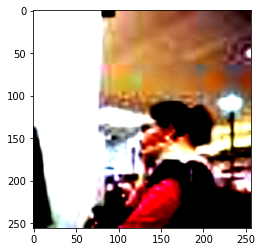

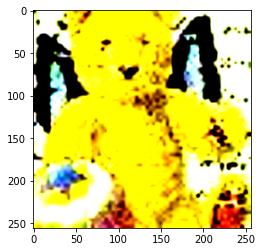

In [10]:
seed_everything(123456)

for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[31].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[11].permute(1, 2, 0))
    plt.show()
    break

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

Я беру efficientnet-b3 и замораживаю ей все слои, кроме полносвязного в конце (источник: https://keras.io/guides/transfer_learning/). там, конечно, keras, а не pytorch, но там описана сама идея, что надо сначала обучать только последний слой/слои, чтобы не повредить веса модели.

In [11]:
class YourNet(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        
        self.model = model

        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):

        return self.model(x)
        # --------------

    def forward(self, images, target=None):
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            _, pred = torch.max(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = torchmetrics.functional.accuracy(self.preds.long(), self.targets.long())

        return loss

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [12]:
def train_epoch(
        model,
        data_loader,
        optimizer,
        return_losses=False,
        device="cuda:0",
):
    model = model.train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for batch in data_loader:
            # move Batch to GPU
            batch = [x.to(device=device) for x in batch]
            loss = model(*batch)
            # update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # update description for tqdm
            accuracy = model.get_accuracy()
            prbar.set_description(
                f"Loss: {loss.item()} "
                f"Accuracy: {accuracy.item()}"
            )
            prbar.update(1)
            total_loss += loss.item()
            num_batches += 1
            all_losses.append(loss.detach().item())
    acc = model.get_accuracy(reset=True)
    metrics = {"loss": total_loss / num_batches, "accuracy": acc}
    if return_losses:
        return metrics, all_losses
    else:
        return metrics


def validate(model, data_loader, device="cuda:0"):
    model = model.eval()
    total_loss = 0
    num_batches = 0
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for batch in data_loader:
            batch = [x.to(device=device) for x in batch]
            loss = model(*batch)
            accuracy = model.get_accuracy()
            prbar.set_description(
                f"Loss: {loss.item()} "
                f"Accuracy: {accuracy.item()}"
            )
            prbar.update(1)
            total_loss += loss.item()
            num_batches += 1
    acc = model.get_accuracy(reset=True)
    print("accuracy:", acc)
    metrics = {"loss": total_loss / num_batches, "accuracy": acc}
    return metrics

In [13]:
def fit(project_name,
        model,
        epochs,
        train_data_loader,
        validation_data_loader,
        optimizer,
        scheduler=None,
        config=None,
        device="cuda:0"
):
    with wandb.init(config=config, project=project_name):
        config = wandb.config
        all_train_losses = []
        epoch_train_losses = []
        epoch_eval_losses = []
        for epoch in range(epochs):
            # construct iterators
            train_iterator = iter(train_data_loader)
            validation_iterator = iter(validation_data_loader)
            # train step
            print(f"Train Epoch: {epoch}")
            train_metrics, one_epoch_train_losses = train_epoch(
                model=model,
                data_loader=train_iterator,
                optimizer=optimizer,
                return_losses=True,
                device=device
            )
            acc = model.get_accuracy()
            wandb.log({"train accuracy": train_metrics["accuracy"]}, step=epoch)
            wandb.log({"train loss": train_metrics["loss"]}, step=epoch)
            # eval step
            print(f"Validation Epoch: {epoch}")
            with torch.no_grad():
                validation_metrics = validate(
                    model=model,
                    data_loader=validation_iterator,
                    device=device
                )
            # log to wandb
            wandb.log({"val accuracy": validation_metrics["accuracy"]}, step=epoch)
            wandb.log({"val loss": validation_metrics["loss"]}, step=epoch)
            # scheduler step
            if scheduler:
                scheduler.step()
            torch.save(model, "model_" + str(epoch))

In [14]:
from tqdm.notebook import tqdm

Обучаю пока только полносвязный слой.

In [ ]:
seed_everything(123456)

efficient_net = EfficientNet.from_pretrained('efficientnet-b3', num_classes=200)

for param in efficient_net.parameters():
    param.requires_grad = False

for param in efficient_net._fc.parameters():
    param.requires_grad = True

params_to_update = []
for param in efficient_net.parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

model = YourNet(efficient_net).to(device=device)

lambda_func = lambda epoch: 0.5 ** epoch
optimizer = torch.optim.Adam(params_to_update, lr=0.001, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)

fit(
    project_name="Task 2",
    model=model,
    epochs=15,
    train_data_loader=train_dataloader,
    validation_data_loader=val_dataloader,
    optimizer=optimizer,
    scheduler=scheduler,
    device=device
)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth


  0%|          | 0.00/47.1M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b3


wandb: Currently logged in as: entrapolarity. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Epoch: 0


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 0


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.6401)
Train Epoch: 1


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 1


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.6502)
Train Epoch: 2


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 2


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.6564)
Train Epoch: 3


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 3


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.6557)
Train Epoch: 4


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 4


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.6572)
Train Epoch: 5


  0%|          | 0/3125 [00:00<?, ?it/s]

train accuracy,▁▆▇██
train loss,█▂▂▁▁
val accuracy,▁▅█▇█
val loss,█▃▁▁▁
train accuracy,0.6091
train loss,1.73097
val accuracy,0.6572
val loss,1.57943


KeyboardInterrupt: ignored

Accuracy застряла на 0.65 (я до этого пыталась не так резко уменьшать learning rate, но это не помогало)

график: https://wandb.ai/entrapolarity/Task%202/runs/37mhrn2a

Сохраню ту модель, которая получилась после последней эпохи, на всякий случай, а то у колаба лимит кончится (переименовала ее в model_finetuned); разморожу все слои и начну дообучать.

In [ ]:
seed_everything(123456)

model = torch.load("model_finetuned")

for param in model.model.parameters():
    param.requires_grad = True

lambda_func = lambda epoch: 0.5 ** epoch
optimizer = torch.optim.Adam(model.model.parameters(), lr=0.0001, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)

fit(
    project_name="Task 2",
    model=model,
    epochs=15,
    train_data_loader=train_dataloader,
    validation_data_loader=val_dataloader,
    optimizer=optimizer,
    scheduler=scheduler,
    device=device
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Epoch: 0


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 0


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.8424)
Train Epoch: 1


  0%|          | 0/3125 [00:00<?, ?it/s]

train accuracy,▁
train loss,▁
val accuracy,▁
val loss,▁
train accuracy,0.77653
train loss,0.85088
val accuracy,0.8424
val loss,0.58346


KeyboardInterrupt: ignored

А вот и accuracy 0.84!

график: https://wandb.ai/entrapolarity/Task%202/runs/3fzomyfi (там одни точки, эпоха только одна)

### Валидация результатов задания

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model._forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())



она по дефолту сохранилась как model_0, переименовываю в model_final и сохраняю себе, передаю в функцию evaluate_task

In [ ]:
model = torch.load("model_final")
model = model.eval()
accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

  0%|          | 0/313 [00:00<?, ?it/s]

Оценка за это задание составит 10.00 баллов


In [ ]:
accuracy

0.8424

# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Для второго задания я сразу взяла предобученную efficientnet-b3 (колаб не потянет b4 и выше), так как с помощью моделей EfficientNet достигается высокое качество классификации на датасете ImageNet (источник: https://www.researchgate.net/figure/The-performance-of-the-EfficientNet-models-versus-other-CNNs-on-ImageNet-from-Tan-Lee_fig2_355191831)

## Эксперимент 1.

Для начала я решила не замораживать ни одного слоя у efficientnet-b3 и дообучать ее "в лоб" (я еще не понимала, как обращаться с замораживанием слоев). Оптимизатор и шедулер вот такие:

In [ ]:
lambda_func = lambda epoch: 0.9 ** epoch
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)

Занимает очень много времени. Accuracy доползает кое-как до 69% (вот график: https://wandb.ai/entrapolarity/uncategorized/runs/2r4l86dv), надо что-то побыстрее, а то до 84% никогда не дойдет

## Эксперимент 2. 

То же самое, только вместо 0.9 learning rate умножается на 0.975 (я подумала, а вдруг мы попали в локальный минимум и не надо так сильно уменьшать learning_rate?)

график: https://wandb.ai/entrapolarity/uncategorized/runs/3mcbd13l

чуть хуже стало, accuracy медленнее растет, чем в предыдущем эксперименте (на третьей эпохе 0.64, а не 0,66)

##Эксперимент 3.

Я уже хотела сдавать решение на 0.69, но разобралась, как замораживать и размораживать слои у efficientnet. Заморозим все слои, кроме полносвязного, и обучим модель с таким же оптимизатором и шедулером, как и в первом эксперименте:

In [16]:
seed_everything(123456)

efficient_net = EfficientNet.from_pretrained('efficientnet-b3', num_classes=200)

for param in efficient_net.parameters():
    param.requires_grad = False

for param in efficient_net._fc.parameters():
    param.requires_grad = True

params_to_update = []
for param in efficient_net.parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

model = YourNet(efficient_net).to(device=device)

lambda_func = lambda epoch: 0.9 ** epoch
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)

fit(
    project_name="Task 2",
    model=model,
    epochs=5,
    train_data_loader=train_dataloader,
    validation_data_loader=val_dataloader,
    optimizer=optimizer,
    scheduler=scheduler,
    device=device
)

Loaded pretrained weights for efficientnet-b3


Train Epoch: 0


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 0


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.6438)
Train Epoch: 1


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation Epoch: 1


  0%|          | 0/313 [00:00<?, ?it/s]

accuracy: tensor(0.6526)
Train Epoch: 2


  0%|          | 0/3125 [00:00<?, ?it/s]

train accuracy,▁█
train loss,█▁
val accuracy,▁█
val loss,█▁
train accuracy,0.58811
train loss,1.72082
val accuracy,0.6526
val loss,1.45527


KeyboardInterrupt: ignored

график: https://wandb.ai/entrapolarity/Task%202/runs/2308385w

## Эксперименты 4 - 5

Чтобы понять, надо ли еще больше уменьшать learning_rate, я заменила в функции для шедулера 0.9 на 0.5. Попробовала потом еще добавить weight_decay 0.001, чтобы предотвратить переобучение, но особой разницы с моделью без weight_decay не оказалось.

график для модели, где weight_decay=0.001 и в lambda_func коэффициент 0.5 (результаты первых двух эпох почти не отличаются от результатов эксперимента 3):

https://wandb.ai/entrapolarity/Task%202/runs/37mhrn2a

Видимо, хватит экспериментировать только с последним слоем, надо брать то, что получилось, и размораживать все слои.

## Итоговое решение

Я взяла модель, получившуюся в результате эксперимента 5, разморозила у нее все слои и снова запустила трейн. Learning rate и weight decay я сделала в 10 раз меньше, чтобы сильно не портить веса (по поводу learning rate: https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751, там тоже указано, что learning rate нельзя слишком большой делать, когда слои размораживаешь). И на первой же эпохе получилось 0.84, больше экспериментов с размораживанием слоев не понадобится.

График в предыдущем пункте - это как раз получается график итогового решения

на всякий случай еще дублирую ссылку на график с результатом одной эпохи дообучения:

https://wandb.ai/entrapolarity/Task%202/runs/3fzomyfi